# Dilated Causal CNN Model Implementation

there arem any core functions that are used which are predefined in various efficient libraries. hence this is to make sure that the most commonlyused ones are present

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

In most cases it's important to aave the intermeditary files and state drives, google drives proves to ne a valuable resursce in this aspect, these lines are to incorporate the files and drives as whole for unrestricted access

In [ ]:
# optional -- to read directly from drive
# for local load -- do directly pd.read_pickle with the respective path
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/solar_irradiation_data.csv")# add the correct path details in oreder to make it work properly\
df

,Time,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
0,2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0
1,2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0
2,2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0
3,2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0
4,2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0
...,...,...,...,...,...,...,...,...,...
27809,2022-09-01 17:00:00,ACST,28.101389,0.000000,145.524306,1.942893,12.795519,95.269921,9648.0
27810,2022-09-01 18:00:00,ACST,0.883333,0.000000,136.775139,1.787685,12.445601,98.542388,9648.0
27811,2022-09-01 19:00:00,ACST,0.000000,0.000000,135.269583,2.099801,11.979293,99.854972,9648.0
27812,2022-09-01 20:00:00,ACST,0.000000,0.000000,129.577778,0.919404,11.599545,99.721071,9648.0


In [ ]:
df.head()

,Time,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
0,2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0
1,2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0
2,2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0
3,2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0
4,2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0


<Axes: >

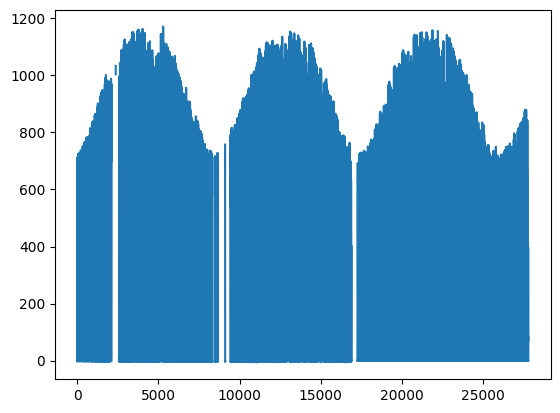

In [ ]:
# test2["Sofia"]["Temp, C"]['2014-01':'2014-12'].plot()
df['GHI_AVG'].plot()

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27814 entries, 0 to 27813
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      27814 non-null  datetime64[ns]
 1   Timezone  27814 non-null  object        
 2   GHI_AVG   25842 non-null  float64       
 3   DNI_AVG   25842 non-null  float64       
 4   WDIR_AVG  25862 non-null  float64       
 5   WSPD_AVG  25862 non-null  float64       
 6   TEMP_AVG  25842 non-null  float64       
 7   HUM_AVG   25842 non-null  float64       
 8   RAIN_SUM  25842 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.9+ MB


In [ ]:
rows = df.shape[0]
cols = df.shape[1]
print("({},{})".format(rows,cols))

# missing values ratio
missing_values_ratio = df.isnull().values.sum()/(rows*cols)
print(missing_values_ratio)

(27814,9)
0.05498430047218427


In [ ]:
# correlatoin matrix
df.corr()

<ipython-input-10-2e8be597ed2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
GHI_AVG,1.000000,0.912059,-0.329958,0.146154,0.483982,-0.417162,0.059037
DNI_AVG,0.912059,1.000000,-0.348575,0.129576,0.399146,-0.431861,0.033731
WDIR_AVG,-0.329958,-0.348575,1.000000,-0.039615,-0.240696,0.201656,0.031923
WSPD_AVG,0.146154,0.129576,-0.039615,1.000000,0.124175,-0.065620,-0.002254
TEMP_AVG,0.483982,0.399146,-0.240696,0.124175,1.000000,-0.601476,0.196544
HUM_AVG,-0.417162,-0.431861,0.201656,-0.065620,-0.601476,1.000000,0.091958
RAIN_SUM,0.059037,0.033731,0.031923,-0.002254,0.196544,0.091958,1.000000


<ipython-input-11-b668b700ffaa>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

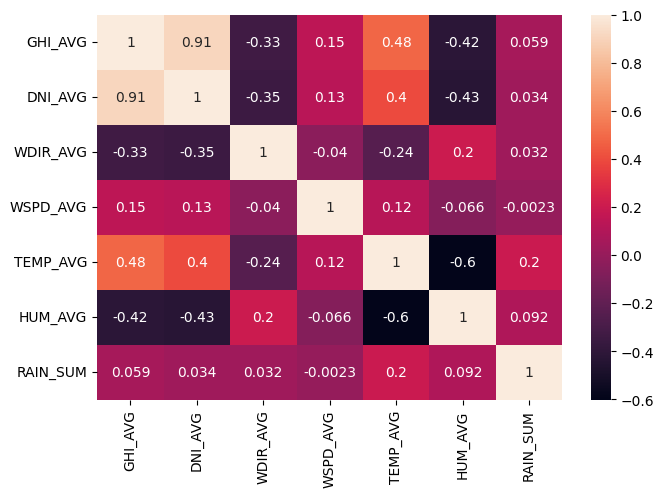

In [ ]:
# Correlation heatmap matirx
import seaborn as sns

plt.rcParams['figure.figsize'] = (7.5,5)
sns.heatmap(df.corr(),annot = True)

In [ ]:
df['GHI_AVG'].isnull().values.sum()

1972

In [ ]:
df1 = df.dropna(subset =['GHI_AVG'] )
df1 = df1.set_index('Time')
df1

,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
Time,,,,,,,,
2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0
2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0
2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0
2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0
2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0
...,...,...,...,...,...,...,...,...
2022-09-01 17:00:00,ACST,28.101389,0.000000,145.524306,1.942893,12.795519,95.269921,9648.0
2022-09-01 18:00:00,ACST,0.883333,0.000000,136.775139,1.787685,12.445601,98.542388,9648.0
2022-09-01 19:00:00,ACST,0.000000,0.000000,135.269583,2.099801,11.979293,99.854972,9648.0


In [ ]:
# df1.index = pd.to_datetime(df1.index)
# df1

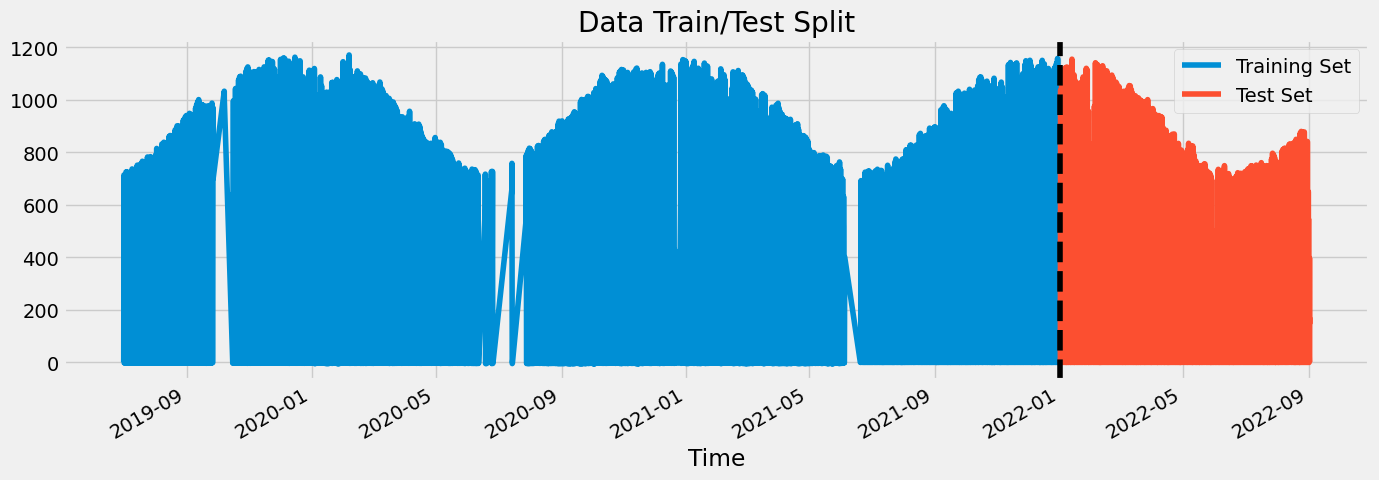

In [ ]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

train = df1['GHI_AVG'].loc[df1.index < '01-01-2022']
test = df1['GHI_AVG'].loc[df1.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

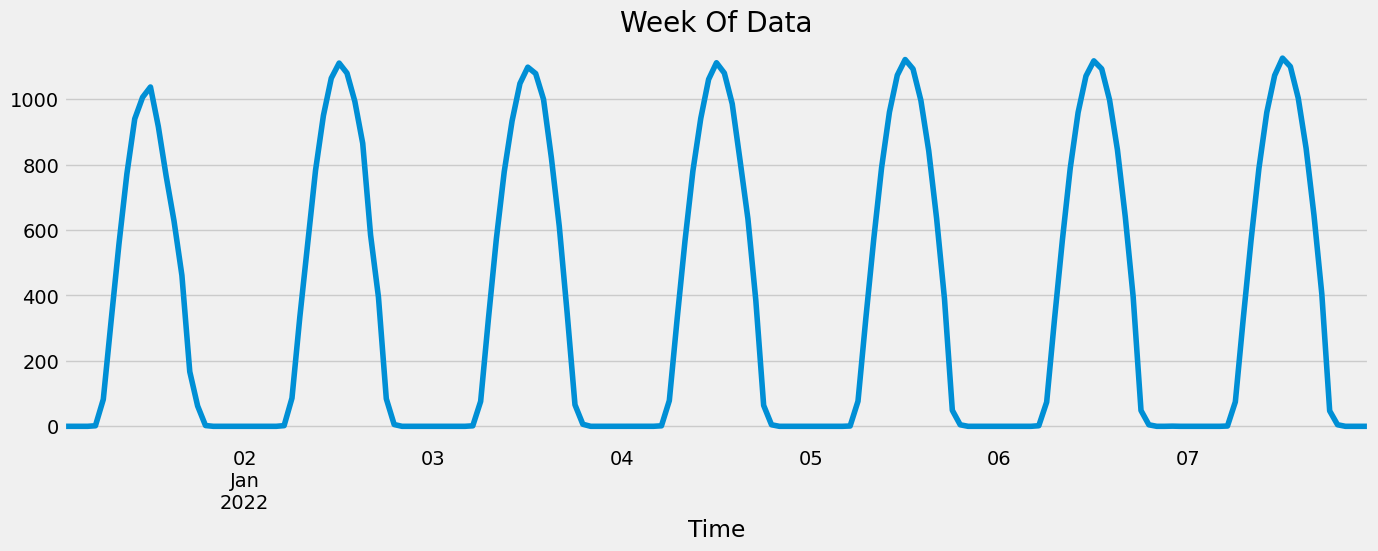

In [ ]:
df1['GHI_AVG'].loc[(df1.index > '01-01-2022') & (df1.index < '01-08-2022')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [ ]:
# FEATURE CREATION 

# def create_features(df):
#     """
#     Create time series features based on time series index.
#     """
# df = df.copy()
df1['hour'] = df1.index.hour
df1['dayofweek'] = df1.index.dayofweek
df1['quarter'] = df1.index.quarter
df1['month'] = df1.index.month
df1['year'] = df1.index.year
df1['dayofyear'] = df1.index.dayofyear
df1['dayofmonth'] = df1.index.day
df1['weekofyear'] = df1.index.isocalendar().week
#     return df

# df = create_features(df)
# df1['hour'] = df1.index.hour
df1

,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Time,,,,,,,,,,,,,,,,
2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0,0,0,3,7,2019,182,1,27
2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0,1,0,3,7,2019,182,1,27
2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0,2,0,3,7,2019,182,1,27
2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0,3,0,3,7,2019,182,1,27
2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0,4,0,3,7,2019,182,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01 17:00:00,ACST,28.101389,0.000000,145.524306,1.942893,12.795519,95.269921,9648.0,17,3,3,9,2022,244,1,35
2022-09-01 18:00:00,ACST,0.883333,0.000000,136.775139,1.787685,12.445601,98.542388,9648.0,18,3,3,9,2022,244,1,35
2022-09-01 19:00:00,ACST,0.000000,0.000000,135.269583,2.099801,11.979293,99.854972,9648.0,19,3,3,9,2022,244,1,35


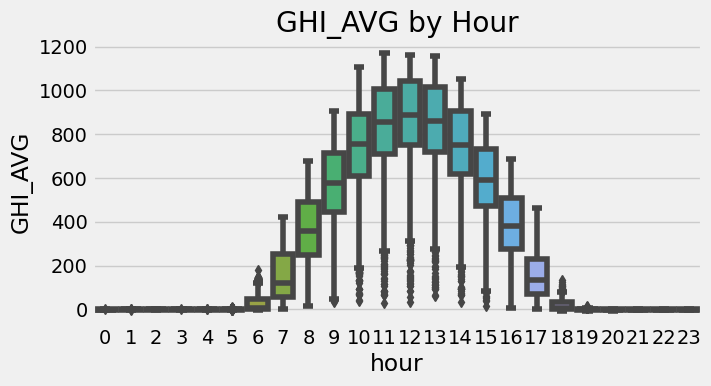

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3.5))
sns.boxplot(data=df1, x='hour', y='GHI_AVG')
ax.set_title('GHI_AVG by Hour')
plt.show()

In [ ]:
shift_days = 3
shift_steps = shift_days * 24  # Number of hours.

In [ ]:
cols = df1.columns
print(cols)

Index(['Timezone', 'GHI_AVG', 'DNI_AVG', 'WDIR_AVG', 'WSPD_AVG', 'TEMP_AVG',
       'HUM_AVG', 'RAIN_SUM', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')


In [ ]:
# assume df is your dataframe
 # list of column names to keep
# df2 = df1.loc[:, keep_cols] # select only the columns in keep_cols

drop_cols = ['Timezone','HUM_AVG', 'RAIN_SUM', 'dayofweek', 'quarter', 'month', 'year','dayofyear', 'dayofmonth', 'weekofyear','WDIR_AVG',	'WSPD_AVG','TEMP_AVG']
for i in drop_cols:
  df1.drop(i,axis = 1, inplace = True)
# df1.drop(['TIME'],axis =1, inplace = True)

In [ ]:
df1

,GHI_AVG,DNI_AVG,hour
Time,,,
2019-07-01 00:00:00,-1.251141,-1.681195,0
2019-07-01 01:00:00,-1.105491,-1.564169,1
2019-07-01 02:00:00,-1.110939,-1.588327,2
2019-07-01 03:00:00,-0.995637,-1.483157,3
2019-07-01 04:00:00,-1.001849,-1.464027,4
...,...,...,...
2022-09-01 17:00:00,28.101389,0.000000,17
2022-09-01 18:00:00,0.883333,0.000000,18
2022-09-01 19:00:00,0.000000,0.000000,19


In [ ]:
keep_cols = [ 'GHI_AVG']
df_targets = df1.loc[:, keep_cols].shift(-shift_steps)
df_targets

,GHI_AVG
Time,
2019-07-01 00:00:00,-1.344495
2019-07-01 01:00:00,-1.247905
2019-07-01 02:00:00,-1.167801
2019-07-01 03:00:00,-1.238675
2019-07-01 04:00:00,-1.143207
...,...
2022-09-01 17:00:00,NaN
2022-09-01 18:00:00,NaN
2022-09-01 19:00:00,NaN


In [ ]:
x_data = df1.values[0:-shift_steps]

In [ ]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (25770, 3)


In [ ]:
y_data = df_targets.values[:-shift_steps]

In [ ]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (25770, 1)


In [63]:
num_data = len(x_data)
print(num_data)

train_split = 0.9

#This is the number of observations in the training-set:

num_train = int(train_split * num_data)
print(num_train)

#This is the number of observations in the test-set:

num_test = num_data - num_train
print(num_test)

25770
23193
2577


In [62]:
y_scaler = MinMaxScaler()
y_data_scaled = y_scaler.fit_transform(y_data)

x_scaler = MinMaxScaler()
x_data_scaled = x_scaler.fit_transform(x_data)

In [64]:
#This is the number of input-signals:

num_x_signals = x_data.shape[1]
print(num_x_signals)

#This is the number of output-signals:

num_y_signals = y_data.shape[1]
print(num_y_signals)

3
1


In [65]:
#These are the input-signals for the training- and test-sets:

x_train_scaled = x_data_scaled[0:num_train]
x_test_scaled = x_data_scaled[num_train:]
print(len(x_train_scaled) + len(x_test_scaled))

#These are the output-signals for the training- and test-sets:

y_train_scaled = y_data_scaled[0:num_train]
y_test_scaled = y_data_scaled[num_train:]
print(len(y_train_scaled) + len(y_test_scaled))

25770
25770


Scale Data

In [71]:
x_train_scaled

array([[0.00433156, 0.00274598, 0.        ],
       [0.00445528, 0.0028542 , 0.04347826],
       [0.00445065, 0.00283186, 0.08695652],
       ...,
       [0.52532973, 0.77729136, 0.43478261],
       [0.60832129, 0.80052256, 0.47826087],
       [0.63569885, 0.80534655, 0.52173913]])

In [ ]:
# print("Min:", np.min(x_train))
# print("Max:", np.max(x_train))

# x_train_float = np.array([x.timestamp() for x in x_train])
# print("Min:", np.min(x_train_float))
# print("Max:", np.max(x_train_float))

Min: -6.350521681765
Max: 1170.911089777592


In [ ]:
#We first create a scaler-object for the input-signals.


# x_scaler = MinMaxScaler()

# #We then detect the range of values from the training-data and scale the training-data.

# x_train_scaled = x_scaler.fit_transform(x_train)

# #Apart from a small rounding-error, the data has been scaled to be between 0 and 1.
# print("Min:", np.min(x_train_scaled))
# print("Max:", np.max(x_train_scaled))


Min: 0.0
Max: 1.0


Data Generator

In [ ]:
# print(x_train.shape)
# print(y_train.shape)

(23193, 3)
(23193, 1)


In [ ]:
# batch generator function from [2]
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [72]:
# bigger batch for this algorithm as it works faster
batch_size = 2048 #1024 #256 #128
#We will use a sequence-length of 1344, which means that each random sequence 
#contains observations for 8 weeks. One time-step corresponds to one hour, so 
#24 x 7 time-steps corresponds to a week, and 24 x 7 x 8 corresponds to 8 weeks.

sequence_length = 24 * 7 * 4 # 4 weeks
# 8 weeks

print(sequence_length)

672


In [ ]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [ ]:
x_batch, y_batch = next(generator)

In [ ]:
print(x_batch.shape)
print(y_batch.shape)

(2048, 672, 3)
(2048, 672, 1)


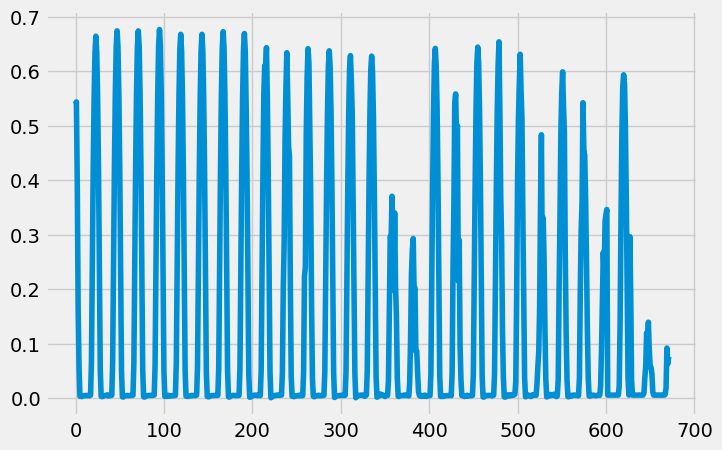

In [ ]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 6 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

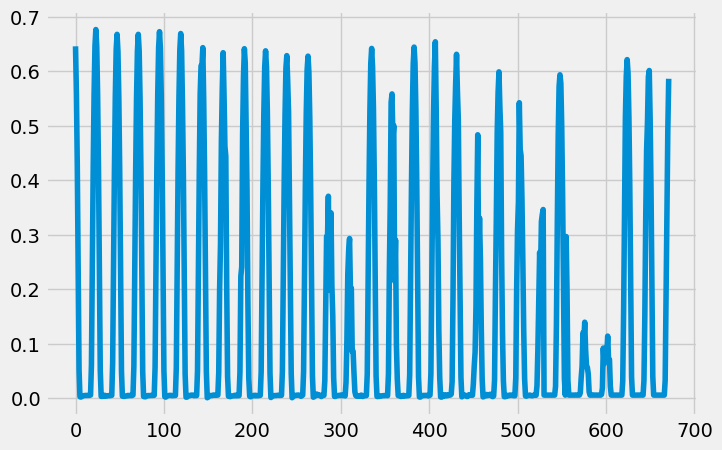

In [ ]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

Validation Set

In [80]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))


validation_data[0][0].shape, x_test_scaled.shape

((2577, 3), (2577, 3))

Create the model: Dilated Causal convolution NN

In [ ]:
import tensorflow as tf
import os

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.optimizers import Adam # ........................................................................................................

# convolutional operation parameters
n_filters = 32 # 32 
filter_width = 2
dilation_rates = [2**i for i in range(8)] * 2 

# define an input history series and pass it through a stack of dilated causal convolution blocks. 
history_seq = Input(shape=(None, 1))
x = history_seq

skips = []
for dilation_rate in dilation_rates:
    
    # preprocessing - equivalent to time-distributed dense
    x = Conv1D(16, 1, padding='same', activation='relu')(x) 
    
    # filter convolution
    x_f = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # gating convolution
    x_g = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # multiply filter and gating branches
    z = Multiply()([Activation('tanh')(x_f),
                    Activation('sigmoid')(x_g)])
    
    # postprocessing - equivalent to time-distributed dense
    z = Conv1D(16, 1, padding='same', activation='relu')(z)
    
    # residual connection
    x = Add()([x, z])    
    
    # collect skip connections
    skips.append(z)

# add all skip connection outputs 
out = Activation('relu')(Add()(skips))

# final time-distributed dense layers 
out = Conv1D(128, 1, padding='same')(out)
out = Activation('relu')(out)
out = Dropout(.2)(out)
out = Conv1D(1, 1, padding='same')(out)

# extract the last 60 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':168})(out)

model = Model(history_seq, pred_seq_train)

Compile Model

In [ ]:
model.compile(Adam(), loss='mean_absolute_error',metrics=['mae', 'acc']) # .................................................................

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, None, 16)     32          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, None, 32)     1056        ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, None, 32)     1056        ['conv1d[0][0]']                 
                                                                                              

Train the Recurrnet Neural Network 

In [ ]:
%%time
history = model.fit_generator(generator=generator,
                    epochs=10, # ideally should be 10
                    steps_per_epoch=25, # ideally should be 100
                    validation_data=validation_data)
#                    callbacks=callbacks)
# no callbacks here

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Restore the weights
# model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

model.save('DCCNN_model.h5')

In [ ]:
model2.save('DCCNN_model2.h5')

NameError: ignored

Performance on the test-set

In [ ]:
result = model2.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

In [ ]:
print("loss (test-set):", result)

In [ ]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss') #?!
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss') #?!
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

Generate Predictions

In [ ]:
warmup_steps=50

In [ ]:
# true vs predicted plot function borrowed from [2]
# also scales back to the original (temperature)
target_names = ['GHI_AVG','hour']
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

In [ ]:
plot_comparison(start_idx=100, length=100, train=True)

In [ ]:
plot_comparison(start_idx=200, length=1000, train=False)